# Introduction

### Nama: Farhan Satrio Yudanto
### Class: RMT-023
### Objective: Perusahaan XYZ merupakan perusahaan pemasok tenaga kerja, oleh karena itu perusahaan membutuhkan model machine learning untuk memprediksi kemungkinan seseorang mendapatkan income, perusahaan akan lebih untung jika berhasil menyalurkan orang dengan gaji diatas 50k dollar. Dalam pemodelan ini menggunakan 5 algoritma yaitu KNN, SVM, Decision Tree, Random Forest, AdaBoosting dan scaler yang di gunakan untuk pemodelan ini adalah MinMaxScaler, adapun tujuan akhir dari pemodelan ini adalah bisa memprediksi income yang akan didapatkan seseorang dengan meminimalisir nilai False Positive

### LinkDeployment: https://huggingface.co/spaces/FarhanStr/milestone2
================================

# Import Libraries

In [1]:
from scipy.stats import pointbiserialr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import warnings
import pickle
import json
import joblib
import re

In [2]:
warnings.filterwarnings("ignore")

# Data Loading

In [3]:
# Loading data frame CSV
data = pd.read_csv("adult.csv")

In [4]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
data.tail(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48832,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
48833,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# EDA

In [6]:
# Mengecek cardinality
cardinality_info = data.nunique()

# Menampilkan informasi cardinality
print("Cardinality (Jumlah Nilai Unik) dalam Setiap Kolom:")
print(cardinality_info)

Cardinality (Jumlah Nilai Unik) dalam Setiap Kolom:
age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64


In [7]:
# Pengecekan duplikat data
duplicate_rows = data[data.duplicated()]

# Menampilkan baris duplikat
print("Jumlah Duplikat Data:", duplicate_rows.shape[0])
print("\nBaris Duplikat:")
print(duplicate_rows)

Jumlah Duplikat Data: 52

Baris Duplikat:
       age         workclass  fnlwgt     education  educational-num  \
864     24           Private  194630     Bachelors               13   
11189   37           Private   52870     Bachelors               13   
11212   29           Private   36440     Bachelors               13   
13848   30           Private  180317     Assoc-voc               11   
15960   18      Self-emp-inc  378036          12th                8   
18476   39           Private  184659       HS-grad                9   
19399   19           Private  130431       5th-6th                3   
19726   41           Private  116391     Bachelors               13   
20606   25           Private  308144     Bachelors               13   
21162   25           Private  308144     Bachelors               13   
21385   90           Private   52386  Some-college               10   
24361   21           Private  243368     Preschool                1   
25189   29                 ?   4128

In [8]:
# Menghapus data yang duplicat
data.drop_duplicates(inplace=True)

In [9]:
# Mengecek apakah ada data yang null
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
# Mencari tahu terkait nama ?
data.isin(['?']).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [11]:
# Mengubah ? menjadi null untuk mempermudah pemoresan data
data.replace('?',np.NaN,inplace =True)

In [12]:
# Mengecek apakah ada data yang null
data.isnull().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [13]:
# Drop data yang kosong
data.dropna(how='any',inplace=True)

In [14]:
# Mendrop kolom fnlwgt, Education dan Race
data = data.drop(['fnlwgt', 'education', 'race'], axis=1)

drop fnlwgt karena hanya berisi bobot survey dan tidak penting, untuk education karena sudah ada colom lain yang memiliki fungsi yang sama. Sedangkan race di hapus karena berhubungan dengan sara, agar perusahaan tidak memandang calon rekruternya berdasarkan ras

In [15]:
num_col = data.select_dtypes(include=np.number).columns.tolist()
cat_nom_col = ['workclass', 'marital-status', 'occupation', 'relationship', 'native-country', 'gender']


In [50]:
data

,age,workclass,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,Not-in-family,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
48840,22,Private,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


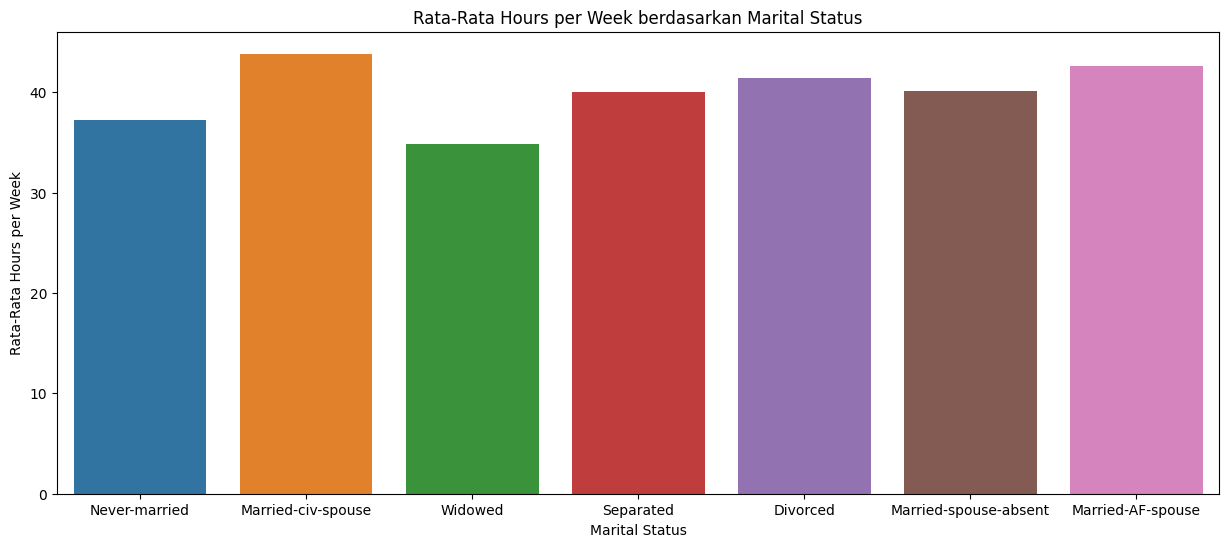

In [56]:
plt.figure(figsize=(15, 6))
sns.barplot(x='marital-status', y='hours-per-week', data=data, ci=None)  
plt.title('Rata-Rata Hours per Week berdasarkan Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Rata-Rata Hours per Week')
plt.show()

Terdapat keunikan pada data ini dimana orang yang telah menikah memiliki rata-rata hours-per-week yang paling tinggi dan orang yang telah di tinggalkan memiliki jumlah kerja yang lebih sedikit. Asumsi saya hal itu dipengaruhi oleh umur mari kita buktikan di bawah

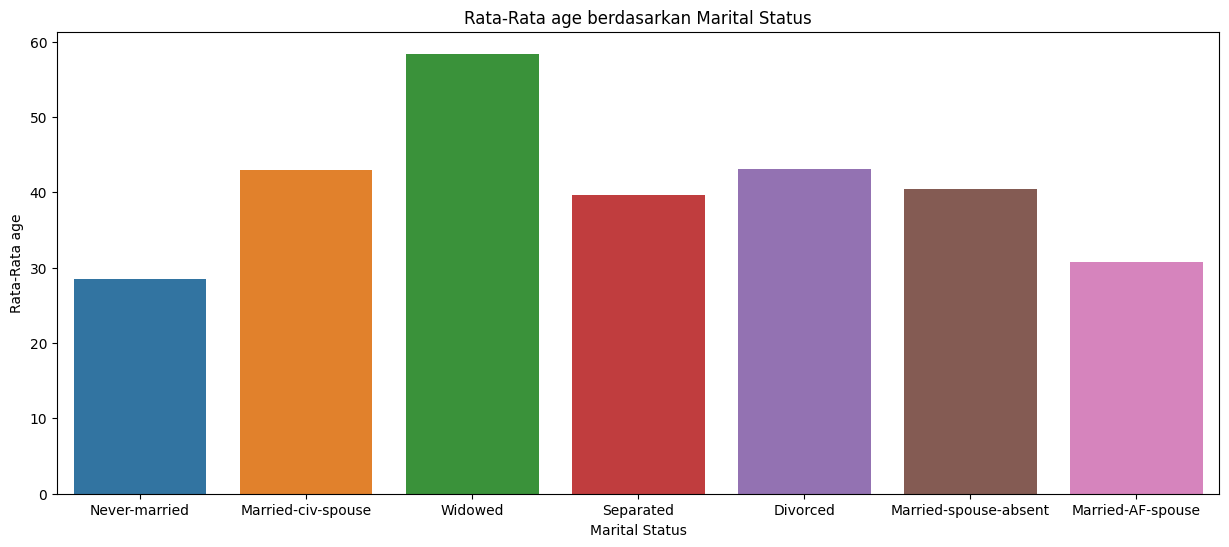

In [57]:
plt.figure(figsize=(15, 6))
sns.barplot(x='marital-status', y='age', data=data, ci=None)  
plt.title('Rata-Rata age berdasarkan Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Rata-Rata age')
plt.show()

Asumsi saya pada plot sebelum nya benar bahwa orang dengan marital status widowed memiliki umur yang tinggi juga, dan sekarang kita mencari tahu apakah umur mempengaruhi jam kerja?

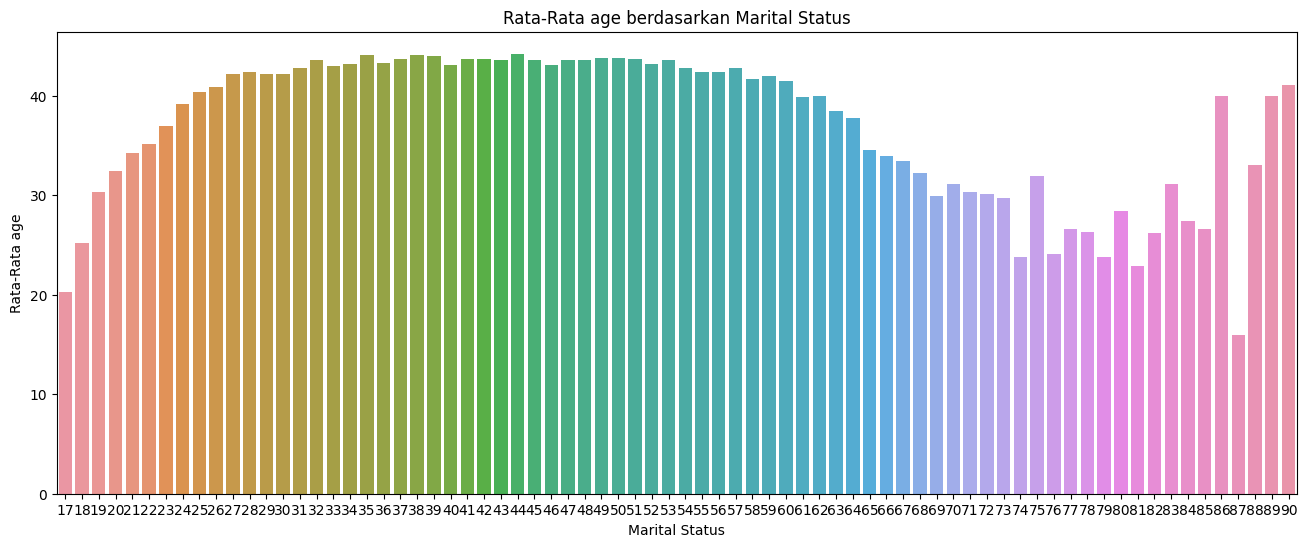

In [59]:
plt.figure(figsize=(16, 6))
sns.barplot(x='age', y='hours-per-week', data=data, ci=None)  
plt.title('Rata-Rata age berdasarkan Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Rata-Rata age')
plt.show()

masa paling produktif terkait jam kerja dalam satu minggu ada di rentan umur 26-59, berarti hal ini menjawab mengapa orang yang widowed memiliki jam kerja paling sedikit dan orang yang menikah resmi memiliki jam kerja yang paling panjang, karena mayoritas orang yang menikah resmi ada di umur produktif sedangkan orang yang widowed sudah lewat masa produktifnya

Text(0, 0.5, 'Jumlah income')

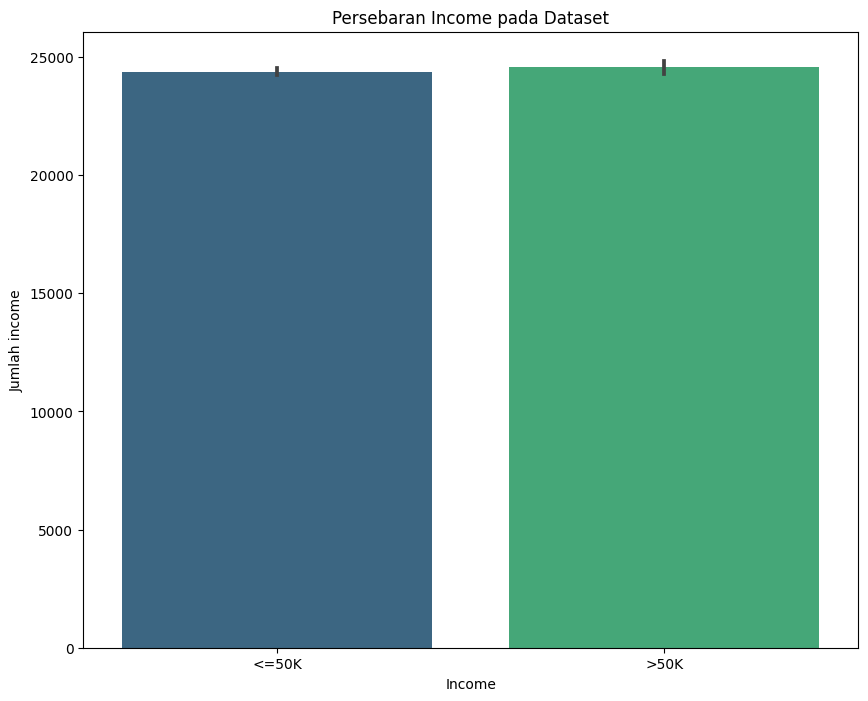

In [60]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['income'].values, y=data['income'].index, palette='viridis')
plt.title("Persebaran Income pada Dataset")
plt.xlabel("Income")
plt.ylabel("Jumlah income")

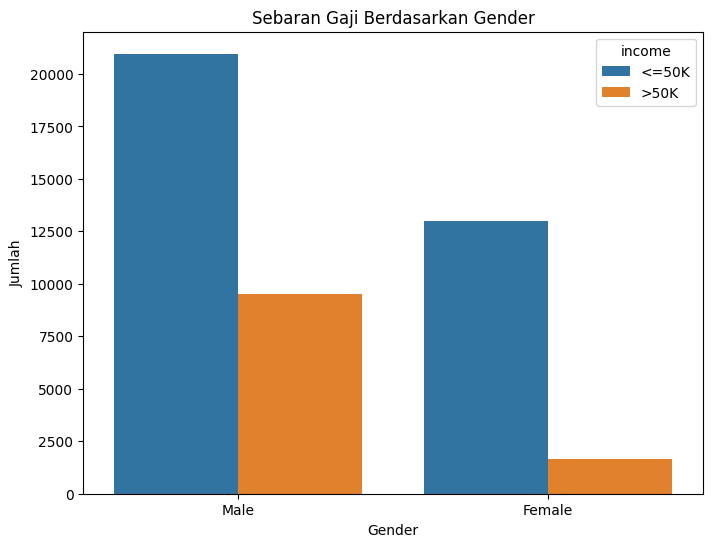

In [61]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='income', data=data)
plt.title('Sebaran Gaji Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

dari total gaji terlihat kedua gender memiliki mayoritas penghasilan di bawah/samadengan 50k tetapi jika di bandingkan antara laki-laki dengan perempuan, laki-laki memiliki jumlah orang dengan pendapatan di atas 50k lebih tinggi dibandingkan dengan perempuan

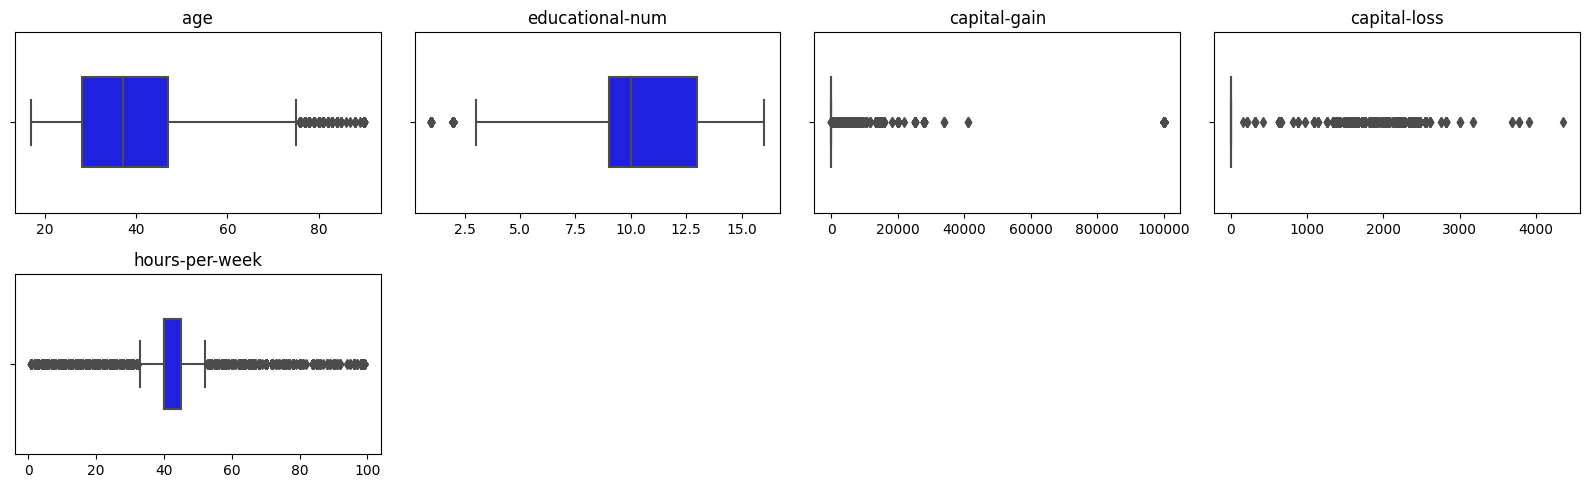

In [62]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(num_col, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=data[column], width=0.5, color='blue')
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

# Feature Engineering

## Feature Selection

In [17]:
# Membuat fungsi untuk encoding data frame tertentu
def encode(df):
    s = (df.dtypes == 'object')
    cat_col = list(s[s].index)
    for i in cat_col:
        lb = LabelEncoder()
        df[i] = lb.fit_transform(df[i])
    return df

In [18]:
# Melakukan pengetesan chi2test agar tidak mengubah data frame utama yang akan digunakan untuk split
def chi2test(df,target):
    df_income = encode(df)
    xl,yl = df_income.drop(target,axis = 1), df_income[target]

    bestfeatures = SelectKBest(score_func=chi2, k='all')
    dfit = bestfeatures.fit(xl,yl)

    df_scores = pd.DataFrame(dfit.scores_)
    df_cols = pd.DataFrame(xl.columns)

    feature_importance = pd.concat([df_cols, df_scores],axis=1)
    feature_importance.columns = ['Feature','Score']
    return feature_importance

In [19]:
# Mengetahui Hubungan kolom kategorikal dengan target yang binary
data_copy = data.copy()
feature_importance = chi2test(data_copy, 'income')
feature_importance.sort_values(by = 'Score',ascending= False)

,Feature,Score
7,capital-gain,1.129415e+08
8,capital-loss,1.848305e+06
0,age,1.147775e+04
9,hours-per-week,8.208195e+03
5,relationship,5.238539e+03
2,educational-num,3.222910e+03
3,marital-status,1.458444e+03
6,gender,6.832710e+02
4,occupation,3.036940e+02
10,native-country,1.807674e+01


Keberadaan seluruh kolom masih masuk akal untuk di pertahankan dan memiliki sumbangsih terkait prediksi nilai target

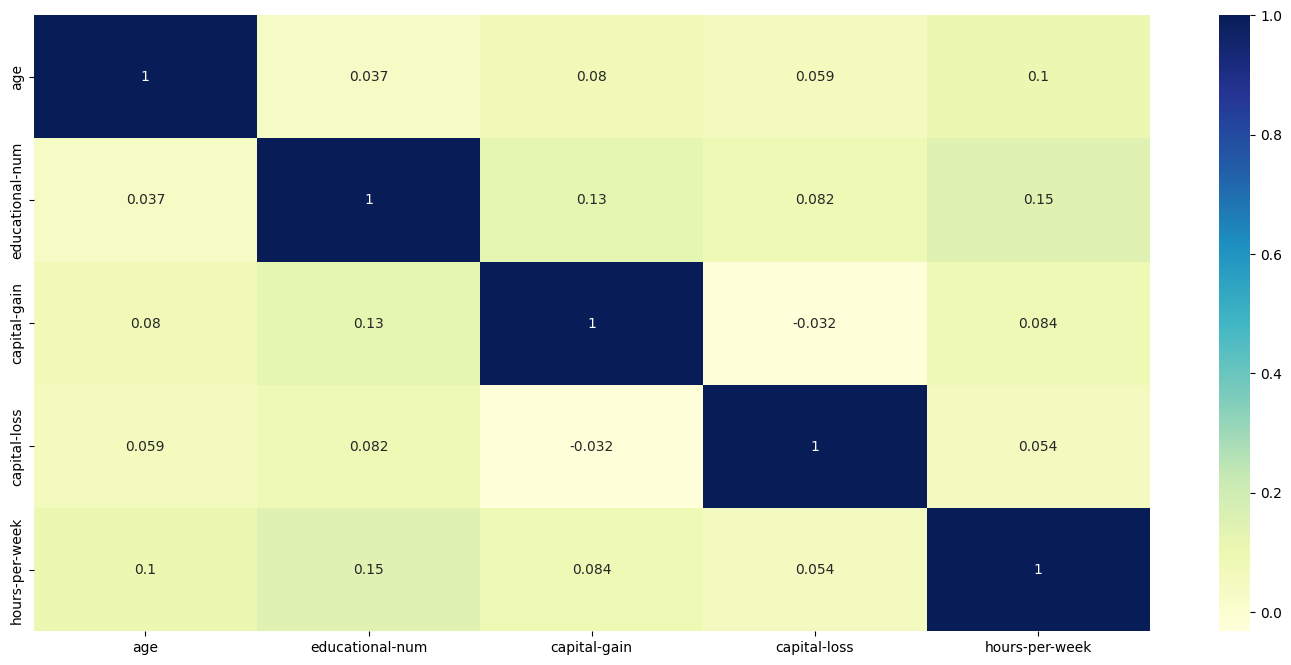

In [20]:
# Cek korelasi antar data
plt.figure(figsize=(18,8))
sns.heatmap(data[num_col].corr(), annot=True, cmap="YlGnBu")
plt.show()

## Spliting

In [21]:
# Split Dataset
X = data.drop(['income'], axis=1)
y = data['income']

In [22]:
X_train, X_test, y_train, y_test, = train_test_split (X,y, test_size = 0.2, random_state = 10)

In [23]:
X_train

,age,workclass,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country
23647,19,Private,4,Never-married,Transport-moving,Unmarried,Male,0,0,25,Guatemala
11266,18,Private,7,Never-married,Priv-house-serv,Own-child,Female,0,0,6,United-States
949,34,Federal-gov,13,Never-married,Exec-managerial,Not-in-family,Male,0,0,44,United-States
10372,44,Private,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,35,United-States
23058,29,State-gov,10,Never-married,Other-service,Unmarried,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...
43296,24,Private,13,Married-civ-spouse,Sales,Other-relative,Male,0,0,40,United-States
30292,38,Private,10,Never-married,Sales,Unmarried,Female,0,0,40,United-States
31565,59,Local-gov,10,Separated,Protective-serv,Not-in-family,Male,0,0,40,United-States
43298,51,Private,12,Divorced,Tech-support,Not-in-family,Male,0,0,30,United-States


## Encoding & Scaling

In [24]:
# Create transformers
num_transformer = Pipeline(steps=[
    ('numscaler', MinMaxScaler())
])

cat_transformer = Pipeline(steps=[
    ('catscaler', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numerik', num_transformer, num_col),
        ('kategorik', cat_transformer, cat_nom_col)
    ])

In [25]:
y_train = y_train.map({'<=50K': 0, '>50K': 1})
y_test = y_test.map({'<=50K': 0, '>50K': 1})

In [26]:
y_train

23647    0
11266    0
949      0
10372    1
23058    0
        ..
43296    0
30292    0
31565    1
43298    0
19133    0
Name: income, Length: 36140, dtype: int64

## Model Definition

In [27]:
# Inisialisasi model KNN
knn_model = KNeighborsClassifier()

# Inisialisasi model SVM
svm_model = SVC()

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier()

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier()

# Inisialisasi model AdaBoost
adaboost_model = AdaBoostClassifier()

In [28]:
# Buat pipeline untuk KNN
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn_model)
])

In [29]:
kf=KFold(n_splits=5)
scoresknn = cross_val_score(pipeline_knn, X_train, y_train, cv=kf)
print("--KNN--")
print("Cross Validation array           :",scoresknn)
print("Best Cross Validation score      :",scoresknn.mean())
print("Standar Deviasi Cross Validation :",scoresknn.std())

--KNN--
Cross Validation array           : [0.81543996 0.82055894 0.82927504 0.82664638 0.82678473]
Best Cross Validation score      : 0.8237410071942446
Standar Deviasi Cross Validation : 0.005047057495670998


In [30]:
# Buat pipeline untuk SVM
pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', svm_model)
])

In [31]:
kf=KFold(n_splits=5)
scoressvm = cross_val_score(pipeline_svm, X_train, y_train, cv=kf)
print("--Support Vector Machine--")
print("Cross Validation array           :",scoressvm)
print("Mean Cross Validation score      :",scoressvm.mean())
print("Standar Deviasi Cross Validation :",scoressvm.std())

--Support Vector Machine--
Cross Validation array           : [0.82899834 0.83494743 0.83674599 0.83646929 0.83757609]
Mean Cross Validation score      : 0.8349474266740454
Standar Deviasi Cross Validation : 0.003093619227310151


In [32]:
# Buat pipeline untuk Decision Tree
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', dt_model)
])


In [33]:
scoresdt = cross_val_score(pipeline_dt, X_train, y_train, cv=kf)
print("--Decision Tree--")
print("Cross Validation array           :",scoresdt)
print("Mean Cross Validation score      :",scoresdt.mean())
print("Standar Deviasi Cross Validation :",scoresdt.std())

--Decision Tree--
Cross Validation array           : [0.80866076 0.81710017 0.81516325 0.8229109  0.81184283]
Mean Cross Validation score      : 0.8151355838406198
Standar Deviasi Cross Validation : 0.004839037573591389


In [34]:
# Buat pipeline untuk Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

In [35]:
scoresrf = cross_val_score(pipeline_rf, X_train, y_train, cv=kf)
print("--Random Forrest--")
print("Cross Validation array           :",scoresrf)
print("Mean Cross Validation score      :",scoresrf.mean())
print("Standar Deviasi Cross Validation :",scoresrf.std())

--Random Forrest--
Cross Validation array           : [0.83467072 0.84214167 0.84463199 0.8471223  0.84200332]
Mean Cross Validation score      : 0.8421140011068069
Standar Deviasi Cross Validation : 0.004167462216616347


In [36]:
# Buat pipeline untuk AdaBoost
pipeline_adaboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', adaboost_model)
])

In [37]:
scoresada = cross_val_score(pipeline_adaboost, X_train, y_train, cv=kf)
print("--AdaBoost--")
print("Cross Validation array           :",scoresada)
print("Mean Cross Validation score      :",scoresada.mean())
print("Standar Deviasi Cross Validation :",scoresada.std())

--AdaBoost--
Cross Validation array           : [0.84836746 0.85196458 0.85680686 0.85971223 0.85666851]
Mean Cross Validation score      : 0.8547039291643609
Standar Deviasi Cross Validation : 0.004025415626766644


Dari ke 5 algoritma didapatkan algoritma adaboost memiliki nilai Cross Validation yang paling tinggi selain itu nilai standard deviasi nya kecil sehingga menunjukkan konsistensi algoritma terhadap data. Oleh karena itu pada model prediksi income ini algoritma AdaBoost yang dipilih untuk dilakukan training dan juga hyper parameter tuning

# Model Training

In [38]:
model_ada = pipeline_adaboost.fit(X_train, y_train)

In [39]:
# Parameter Untuk hyper parameter tuning AdaBoost
param_grid_adaboost = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.5]
}

In [40]:
gridada = GridSearchCV(pipeline_adaboost, param_grid_adaboost, cv=5)
gridada.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerik',
                                                                         Pipeline(steps=[('numscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('kategorik',
                                                                         Pipeline(steps=[('catscaler',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['workclass',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'native-country',
                                                                          'gender'])])),
                                       ('classifier', AdaBoostClassifier())]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.5],
                         'classifier__n_estimators': [50, 100, 200]})

In [41]:
# Get the best svm hyperparameter best estimator training model
model_ada_gridsearchCV = gridada.best_estimator_
model_ada_gridsearchCV

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerik',
                                                  Pipeline(steps=[('numscaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('catscaler',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['workclass',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'native-country',
                                                   'gender'])])),
                ('classifier',
                 AdaBoostClassifier(learning_rate=0.5, n_estimators=200))])

In [42]:
# Finding the value of cross validation after hyperparameter best estimator
scores = cross_val_score(model_ada_gridsearchCV, X_train, y_train, cv=5)
print("Cross Validation Score model_svm_gridsearchCV array     :",scores)
print("Best Cross Validation Score model_svm_gridsearchCV      : {:.3f}".format(gridada.best_score_))
print("Standar Deviasi Cross Validation model_svm_gridsearchCV : {:.3f}".format(gridada.best_score_.std()))

Cross Validation Score model_svm_gridsearchCV array     : [0.855285   0.8555617  0.863171   0.86123409 0.85929718]
Best Cross Validation Score model_svm_gridsearchCV      : 0.859
Standar Deviasi Cross Validation model_svm_gridsearchCV : 0.000


setelah dilakukan hyper parameter tuning nilai cross validation adaboost meningkat sedikit dan juga nilai standart deviasi semakin kecil sehingga setelah dilakukan hyperparameter tuning di dapatkan model yang lebih baik dari sebelum di tuning

# Model Evaluation

In [43]:
# AdaBoosting Model Accuracy Performance
y_pred_train_ada= model_ada.predict(X_train)
y_pred_test_ada = model_ada.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_ada))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_ada))

accuracy score train :  0.8570005534034311
accuracy score test :  0.8575539568345324


In [44]:
# Best AdaBoosting Model Accuracy Performance
y_pred_train_ada_gridsearchCV= model_ada_gridsearchCV.predict(X_train)
y_pred_test_ada_gridsearchCV = model_ada_gridsearchCV.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_ada_gridsearchCV))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_ada_gridsearchCV))

accuracy score train :  0.8603763143331489
accuracy score test :  0.8595462091864969


In [63]:
recall_train_ada = recall_score(y_train, y_pred_train_ada_gridsearchCV)
recall_test_ada = recall_score(y_test, y_pred_test_ada_gridsearchCV)

print(f"Recall: {recall_train_ada:.4f}")
print(f"Recall: {recall_test_ada:.4f}")

Recall: 0.6145
Recall: 0.6161


confusion matrix AdaBoosting Train Set


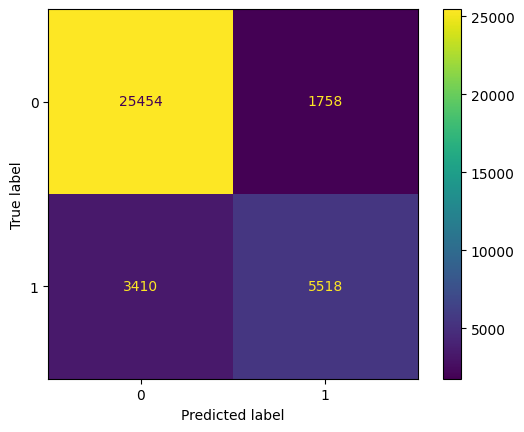

                                           
confusion matrix AdaBoosting Test Set


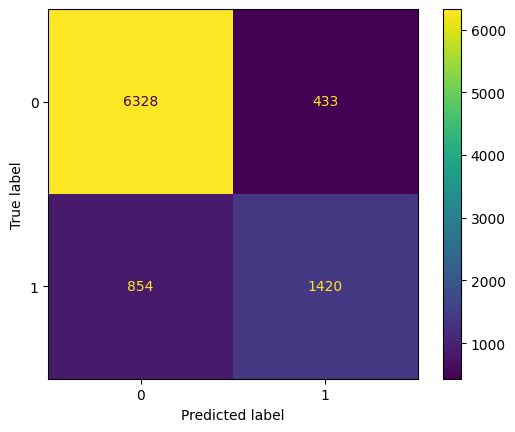

In [45]:
# Confusion Matrix AdaBoosting table with 4 different combinations of predicted value and actual value
print('confusion matrix AdaBoosting Train Set')
ab = confusion_matrix(y_train,y_pred_train_ada, labels=model_ada.classes_)
dispnb = ConfusionMatrixDisplay(confusion_matrix=ab,display_labels=model_ada.classes_)
dispnb.plot()
plt.show()
print('                                           ')
print('confusion matrix AdaBoosting Test Set')
ab2 = confusion_matrix(y_test,y_pred_test_ada, labels=model_ada.classes_)
dispab2 = ConfusionMatrixDisplay(confusion_matrix=ab2,display_labels=model_ada.classes_)
dispab2.plot()
plt.show()

 Best confusion matrix AdaBoosting Train Set


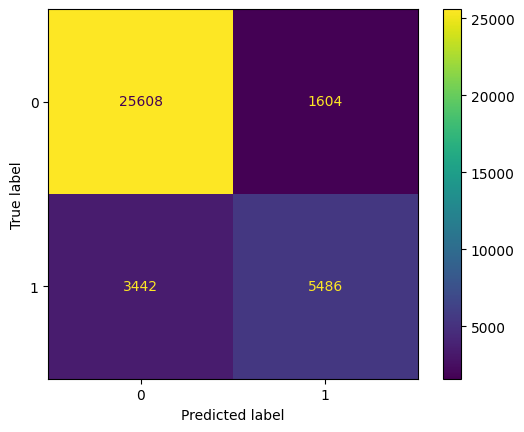

                                           
 Best confusion matrix AdaBoosting Test Set


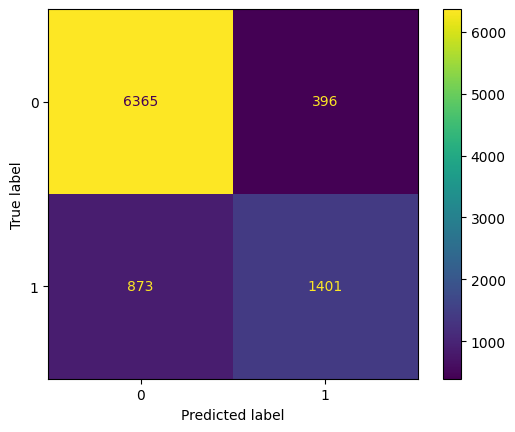

In [46]:
# Best Confusion Matrix AdaBoosting table with 4 different combinations of predicted value and actual value
print(' Best confusion matrix AdaBoosting Train Set')
ab = confusion_matrix(y_train,y_pred_train_ada_gridsearchCV, labels=model_ada_gridsearchCV.classes_)
dispnb = ConfusionMatrixDisplay(confusion_matrix=ab,display_labels=model_ada_gridsearchCV.classes_)
dispnb.plot()
plt.show()
print('                                           ')
print(' Best confusion matrix AdaBoosting Test Set')
ab2 = confusion_matrix(y_test,y_pred_test_ada_gridsearchCV, labels=model_ada_gridsearchCV.classes_)
dispab2 = ConfusionMatrixDisplay(confusion_matrix=ab2,display_labels=model_ada_gridsearchCV.classes_)
dispab2.plot()
plt.show()

pada train set:
TP : 25608
TN : 5486
FP : 1604
FN : 3442
pada test set:
TP : 6365
TN : 1401
FP : 396
FN : 873

Nilai kesalahan prediksi yang ada pada train set sebesar +- 14 persen dimana +- 68 di prediksi sebagai false negative dan +- 31 persen diprediksi sebagai false positif dan pada test set nilai nya hampir sama dengan train set

In [47]:
# classification model AdaBoosting to predict opportunities that occur
print('classification report AdaBoosting Train Set')
print(classification_report(y_train,y_pred_train_ada))
print('                                  ')
print('classification report AdaBoosting Test Set')
print(classification_report(y_test,y_pred_test_ada))

classification report AdaBoosting Train Set
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     27212
           1       0.76      0.62      0.68      8928

    accuracy                           0.86     36140
   macro avg       0.82      0.78      0.79     36140
weighted avg       0.85      0.86      0.85     36140

                                  
classification report AdaBoosting Test Set
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6761
           1       0.77      0.62      0.69      2274

    accuracy                           0.86      9035
   macro avg       0.82      0.78      0.80      9035
weighted avg       0.85      0.86      0.85      9035



In [48]:
# Best Classification model AdaBoosting to predict opportunities that occur
print('classification report AdaBoosting Train Set')
print(classification_report(y_train,y_pred_train_ada_gridsearchCV))
print('                                  ')
print('classification report AdaBoosting Test Set')
print(classification_report(y_test,y_pred_test_ada_gridsearchCV))

classification report AdaBoosting Train Set
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     27212
           1       0.77      0.61      0.68      8928

    accuracy                           0.86     36140
   macro avg       0.83      0.78      0.80     36140
weighted avg       0.85      0.86      0.85     36140

                                  
classification report AdaBoosting Test Set
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6761
           1       0.78      0.62      0.69      2274

    accuracy                           0.86      9035
   macro avg       0.83      0.78      0.80      9035
weighted avg       0.85      0.86      0.85      9035



secara garis besar kesimpulan dari model ini adalah:


model lebih baik dalam memprediksi nilai 0 dibandingkan dengan memprediksi nilai 1, selain itu kesalahan tafsir tersebut kebanyakan adalah nilai yang seharusnya 1 tetapi di prediksi sebagai 0 atau FN hal itu juga terlihat pada confusion matrix yang telah di tampilkan sebelumnya atau dengan kata lain Meskipun tingkat akurasi secara keseluruhan cukup tinggi, perlu diperhatikan bahwa recall untuk kategori gaji di atas $50K (kelas 1) relatif lebih rendah. Hal ini dapat diartikan bahwa model cenderung kurang sensitif dalam mengidentifikasi individu yang sebenarnya memiliki gaji di atas $50K, dan ada potensi untuk tidak mendeteksi sejumlah individu dalam kategori ini. Tetapi hal itu masih sejalan dengan kebutuhan bisnis, karena PT XYZ tidak bisa menampung seluruh karyawan yang di data melainkan PT XYZ hanya mengambil karyawan yang sudah pasti mendaptkan gaji diatas 50k

# Model Saving

In [49]:
with open('model_scaler.pkl', 'wb') as file_1:
    pickle.dump(num_transformer, file_1)
with open('model_train', 'wb') as file_2:
    pickle.dump(model_ada_gridsearchCV, file_2)
with open('model_encoder', 'wb') as file_3:
    pickle.dump(cat_transformer, file_3)
with open('list_num.json', 'w') as file_4:
    json.dump(num_col, file_4)
with open('list_cat.json', 'w') as file_5:
    json.dump(cat_nom_col, file_5)
with open('model_prepocessor', 'wb') as file_6:
    pickle.dump(preprocessor, file_6)
with open('model_adaboost', 'wb') as file_7:
    pickle.dump(adaboost_model, file_7)

# Model Inference

In [52]:
# Load MinMaxScaler model
with open('model_scaler.pkl', 'rb') as file_1:
    num_trans = pickle.load(file_1)

# Load AdaBoost model
with open('model_train', 'rb') as file_2:
    ada_gridsearchCV = pickle.load(file_2)

# Load OneHotEncoder model
with open('model_encoder', 'rb') as file_3:
    cat_trans = pickle.load(file_3)

# Load list_num from JSON
with open('list_num.json', 'r') as file_4:
    num_cols = json.load(file_4)

# Load list_cat from JSON
with open('list_cat.json', 'r') as file_5:
    cat_cols = json.load(file_5)

# Load ColumnTransformer preprocessor
with open('model_prepocessor', 'rb') as file_6:
    model_preprocessor = pickle.load(file_6)

# Load AdaBoostClassifier model
with open('model_adaboost', 'rb') as file_7:
    ada_model = pickle.load(file_7)

In [51]:
data_new = pd.DataFrame({
    'age': [25, 38, 28, 44, 34],
    'workclass': ['Private', 'Private', 'Local-gov', 'Private', 'Private'],
    'educational-num': [7, 9, 12, 10, 6],
    'marital-status': ['Never-married', 'Married-civ-spouse', 'Married-civ-spouse', 'Married-civ-spouse', 'Never-married'],
    'occupation': ['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', 'Machine-op-inspct', 'Other-service'],
    'relationship': ['Own-child', 'Husband', 'Husband', 'Husband', 'Not-in-family'],
    'gender': ['Male', 'Male', 'Male', 'Male', 'Male'],
    'capital-gain': [0, 0, 0, 7688, 0],
    'capital-loss': [0, 0, 0, 0, 0],
    'hours-per-week': [40, 50, 40, 40, 30],
    'native-country': ['United-States', 'United-States', 'United-States', 'United-States', 'United-States'],
})

In [53]:
y_pred_inf_ada = ada_gridsearchCV.predict(data_new)
y_pred_inf_ada_fin = pd.DataFrame(y_pred_inf_ada, columns=['income-pred'])
y_pred_inf_ada_fin 

,income-pred
0,0
1,0
2,0
3,1
4,0


# Kesimpulan

## Conceptual Problems

1. Bagging merupakan singkatan dari Bootstrap aggregating, bagging sendiri sangat berguna untuk membantu meningkatkan accuracy dan mengurangi overfitting ketika kita menghadapi model yang memiliki high variance oleh karena kegunaan tersebut bagging bisa ada. Cara kerja bagging beberapa subset random dari dataset train diambil  dengan penggantian. setiap subset ini berisi sampel yang sudah muncul beberapa kali atau bahkan belum pernah muncul, shingga menciptakan variasi dalam model train dan dapat mengurangi resiko overfitting, setelah model tersebut dilatih secara independen pada subset tersebut, model diminta membuat prediksi terhadap data yang belum pernah muncul sebelum nya, lalu dipilih berdasarkan voting paling banyak. Bagging menggunakan metode OOB untuk mengevaluasi kinerja model pada sampel yang tidak digunakan selama pelatihan. Sehingga bagging menjadi jawaban untuk mengatasi overfitting serta meningkatkan akurasi model


2. Random Forest dan AdaBoost adalah dua pendekatan ensemble learning yang berbeda untuk membuat prediksi model. Random Forest menggunakan teknik bootstrap sampling untuk membuat beberapa decision trees yang bekerja secara independen, dengan setiap pohon dibangun pada subset unik dari dataset pelatihan. Pada setiap iterasi, model ini memberi bobot berbeda pada sejumlah kecil fitur, meningkatkan keberagaman prediksi. Prediksi akhir dibuat dengan mayoritas voting dari semua pohon. Sementara itu, AdaBoost memberi bobot pada setiap sampel dalam dataset berdasarkan kinerja model sebelumnya, memberi penekanan pada sampel yang sulit diprediksi. Weak learners digunakan secara berurutan, dan bobot kesalahan diperhitungkan untuk meningkatkan akurasi pada setiap iterasi. Prediksi akhir dihasilkan dari gabungan prediksi-prediksi weak learners. Dengan demikian, meskipun keduanya adalah metode ensemble, Random Forest dan AdaBoost memiliki pendekatan yang unik dalam meningkatkan kinerja model prediktif.


3. Cross-validation adalah suatu teknik dalam machine learning yang digunakan untuk mengevaluasi kinerja model secara objektif. Dalam cross-validation, dataset dibagi menjadi beberapa subset atau folds. Proses pelatihan dan evaluasi dilakukan secara berulang menggunakan folds yang telah di tentukan . Pada setiap iterasi, satu folds digunakan sebagai dataset pengujian, sedangkan folds lainnya digunakan sebagai dataset pelatihan. Proses ini diulangi sejumlah folds yang telah ditentukan sebelumnya.

## Kesimpulan Model

Model ini menggunakan Ada Boost sebagai algoritmanya dan MinMax Scaler sebagai scaler nya dan di dapatkan hasil recall train dan test sebesar 61%, mengapa recall menjadi parameter yang digunakan karena hal yang ingin di cegah adalah orang dengan actual gaji di bawah atau samadengan 50k tetapi di prediksi diatas 50k hal itu akan merugikan perusahaan, karena slot yang harus nya diisi oleh orang yang berpotensi digaji diatas 50k terkalahkan dengan orang yang memiliki nilai actual gaji dibawah atau samadengan 50k. Adapun dalam mengambil sample, juga bisa memperhatikan umur, seperti yang telah di dalami pada EDA bahwa umur mempengaruhi work hour sehingga akan mempengaruhi income juga.

bisnis insight dari model ini adalah perusahaan bisa lebih effective dalam mendapatkan pemasukan, karena perusahaan mendapatkan revenue dari presentase gaji yang didapatkan oleh recruter mereka, ketika semakin tinggi gaji yang diterima maka perusahaan akan mendapatkan untung yang lebih besar, dengan model ini perusahaan bisa memaksimalkan kesempatannya untuk benar benar memastikan orang yang dikirimnya ke mitra yang membutuhkan tenaga kerja memiliki kriteria untuk mendapatkan gaji diatas 50k.

tentunya model ini memiliki kelemahan, karena akurasi recall nya hanya 61% hal itu menyebabkan model yang diberikan masih jauh dari sempurna. tetapi hal itu masih bisa di kembangkan lagi dengan beberapa poin:
    1. Pembuat model selanjutnya bisa melakukan encoding sesuai dengan setiap keterangan kolom
    2. Mencoba semua jenis scaling untuk membandingkan masing masing score yang dihasilkan
    3. Handling Outlier, data yang akan di olah harus benar benar dipastikan bersih dari outlier atau outlier yang ada masuk akal
    4. mencoba seluruh hyperparameter yang belum dilakukan karena keterbatasan waktu
    5. mengolah data bersama ahli lapangan yang mengetahui seluk beluk pengambilan data, dan fungsinya terhadap pemodelan